In [96]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Our dataset doesn't have any variable names, so we created a product variable.
df = pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/USL/AssociationRules/Advanced/bread basket.csv")


In [99]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [100]:
# Group by 'Transaction' and aggregate 'Item' into lists
grouped = df.groupby('Transaction')['Item'].apply(list)

# Convert to list of lists (this is what Apriori expects)
product_list = grouped.tolist()


In [101]:
product_list

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [102]:
type(product_list)

list

###In association analysis, the dataframe must be either 1 and 0's or a Boolean data structure type as True / False.

In [103]:
from mlxtend.preprocessing import TransactionEncoder

In [104]:
# One Hot Encoding process has been done.
temp = TransactionEncoder()
temp_df = temp.fit(product_list).transform(product_list)
new_df = pd.DataFrame(temp_df,columns=temp.columns_)
new_df

Output hidden; open in https://colab.research.google.com to view.

Dataframe is now suitable for association analysis. The next step will be to calculate and interpret the support and confidence values.

In [105]:
# We set our support value as 20%

support_values = apriori(new_df, min_support=0.01, use_colnames=True, verbose = 1)
support_values

Processing 12 combinations | Sampling itemset size 4


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


### **To get a better understanding of how support is calculated we are adding "Support_calc" column that will show the calculation part**

In [106]:
# Total number of transactions
total_txns = len(new_df)

# Add a calculation column
support_values['support_calc'] = support_values['support'].apply(
    lambda s: f"{int(s * total_txns)} / {total_txns} = {round(s, 2)}"
)

support_values

,support,itemsets,support_calc
0,0.036344,(Alfajores),344 / 9465 = 0.04
1,0.016059,(Baguette),152 / 9465 = 0.02
2,0.327205,(Bread),3096 / 9465 = 0.33
3,0.040042,(Brownie),379 / 9465 = 0.04
4,0.103856,(Cake),983 / 9465 = 0.1
5,0.012995,(Chicken Stew),123 / 9465 = 0.01
6,0.478394,(Coffee),4528 / 9465 = 0.48
7,0.019440,(Coke),184 / 9465 = 0.02
8,0.054411,(Cookies),515 / 9465 = 0.05
9,0.039197,(Farm House),371 / 9465 = 0.04


In [107]:
support_values.shape

(61, 3)

In [108]:

support_values.sort_values(by = "support", ascending = False)


,support,itemsets,support_calc
6,0.478394,(Coffee),4528 / 9465 = 0.48
2,0.327205,(Bread),3096 / 9465 = 0.33
26,0.142631,(Tea),1350 / 9465 = 0.14
4,0.103856,(Cake),983 / 9465 = 0.1
34,0.090016,"(Coffee, Bread)",852 / 9465 = 0.09
19,0.086107,(Pastry),815 / 9465 = 0.09
21,0.071844,(Sandwich),680 / 9465 = 0.07
16,0.061807,(Medialuna),585 / 9465 = 0.06
12,0.058320,(Hot chocolate),552 / 9465 = 0.06
42,0.054728,"(Cake, Coffee)",518 / 9465 = 0.05


##We access our "confidence and lift" values using association_rules function


###  **Confidence**
**When A is bought, how often is B also bought?**  
It shows the **strength of implication**.

>  *"Out of those who bought Bread, how many also bought Butter?"*

 **Formula:**  
$[
\text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
]$

---

In [109]:
from mlxtend.frequent_patterns import association_rules

# Generate rules
rules = association_rules(support_values, metric="confidence", min_threshold=0.5)

# Sort by confidence and lift
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Select only important columns
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules



,antecedents,consequents,support,confidence,lift
10,(Toast),(Coffee),0.023666,0.704403,1.472431
9,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
5,(Medialuna),(Coffee),0.035182,0.569231,1.189878
6,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235
4,(Juice),(Coffee),0.020602,0.534247,1.116750
7,(Sandwich),(Coffee),0.038246,0.532353,1.112792
1,(Cake),(Coffee),0.054728,0.526958,1.101515
8,(Scone),(Coffee),0.018067,0.522936,1.093107
2,(Cookies),(Coffee),0.028209,0.518447,1.083723


## **Interpreting Results**
---
Here are some observations based on the provided association rules:

1. **Strong Associations with Coffee**:
   - The majority of the antecedents in this dataset are items that are commonly associated with coffee, such as **Toast**, **Spanish Brunch**, **Medialuna**, **Pastry**, **Alfajores**, **Juice**, **Sandwich**, **Cake**, **Scone**, **Cookies**, and **Hot chocolate**. This indicates that customers tend to buy coffee together with a wide variety of other items.

2. **High Confidence and Support**:
   - The rule with the highest confidence is **(Toast → Coffee)**, with a confidence of 0.704, meaning that when customers purchase toast, there is a 70.4% chance that they will also buy coffee. Similarly, **(Cake → Coffee)** has the highest support (0.054728), showing that coffee is often purchased together with cake.
   
3. **Lift Values**:
   - The lift values suggest the strength of association between the antecedents and consequents beyond random chance. For example, **(Toast → Coffee)** has a lift of 1.47, indicating that the purchase of coffee with toast is 1.47 times more likely than it would be by chance. This shows a moderate positive association.
   - **(Spanish Brunch → Coffee)** has a lift of 1.25, indicating a slightly weaker but still positive relationship.
   - **(Hot Chocolate → Coffee)** has the lowest lift of 1.06, indicating the weakest association among the listed rules, though still greater than random chance.

4. **Less Frequent Combinations**:
   - Items like **Spanish Brunch** and **Alfajores** have lower support (0.010882 and 0.019651, respectively), suggesting that while these combinations exist, they are less frequent compared to more common pairings like **Cake** or **Sandwich** with coffee.

5. **General Trend**:
   - The rules consistently show that **coffee** is the most common consequent item. This suggests coffee is a staple product that pairs well with various bakery items, snacks, and light meals in this dataset.

6. **Moderate Variability**:
   - There is some variability in confidence and lift values across the different rules, with some combinations like **Cake → Coffee** having a higher confidence than others like **Cookies → Coffee**. This indicates that while coffee is a common item, the likelihood of pairing it with certain antecedents varies significantly.



#**In Real-Time Scenarios LIFT is a better metric than confidence , so always filter results by LIFT  rather than confidence**

In [110]:
rules = association_rules(support_values, metric= "lift", min_threshold = 1)

rules = rules.sort_values(['lift', 'confidence'], ascending =[False, False])

# Select only important columns
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules


,antecedents,consequents,support,confidence,lift
39,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
40,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
31,(Toast),(Coffee),0.023666,0.704403,1.472431
30,(Coffee),(Toast),0.023666,0.049470,1.472431
37,(Pastry),"(Coffee, Bread)",0.011199,0.130061,1.444872
36,"(Coffee, Bread)",(Pastry),0.011199,0.124413,1.444872


Here are some observations based on the association rules sorted by lift:

1. **Strongest Association**:
   - The rule **(Tea, Coffee → Cake)** and **(Cake → Tea, Coffee)** both have the highest lift of **1.937977**, which indicates a strong relationship between tea, coffee, and cake. This suggests that when customers buy both tea and coffee, they are almost twice as likely to purchase cake. Similarly, the presence of cake also significantly increases the likelihood of buying both tea and coffee.
   - The lift is notably high for this combination, signaling a robust and interesting customer behavior that tea, coffee, and cake are commonly purchased together.

2. **High Confidence for Cake Combinations**:
   - The rule **(Hot chocolate → Cake)** has a confidence of **0.195652**, suggesting that when customers buy hot chocolate, there's a 19.6% chance they'll also buy cake. The lift of **1.883874** reinforces that this combination is also stronger than random chance, but not as strong as the tea-coffee-cake association.

3. **Moderate Association**:
   - **(Tea → Cake)** and **(Cake → Tea)** both have a lift of **1.604781**, showing a moderate association. The support for these rules is relatively higher, especially for **(Cake → Tea)** with a confidence of **0.228891**, indicating that cake and tea are a reasonably common pair, though not as strong as the combinations involving coffee.

4. **Toast and Coffee Association**:
   - **(Toast → Coffee)** has a strong confidence of **0.704403** and a lift of **1.472431**, meaning toast and coffee are frequently bought together. However, the reverse rule **(Coffee → Toast)** has a much lower confidence of **0.049470**, suggesting that while toast is often purchased with coffee, coffee alone does not strongly drive the purchase of toast.

5. **Pastry and Coffee-Bread Combination**:
   - The combination **(Pastry → Coffee, Bread)** and **(Coffee, Bread → Pastry)** both show a lift of **1.444872**, indicating a moderate association between these items. Pastries are moderately associated with the combination of coffee and bread, but the support and confidence values are relatively low, meaning this is not as common as the more popular combinations like cake or toast with coffee.

6. **Sandwich and Tea**:
   - The rule **(Sandwich → Tea)** with a lift of **1.402222** and a confidence of **0.200000** shows a moderate association. While sandwiches and tea are somewhat likely to be bought together, the lift is lower than the other associations, indicating it is not as strong a relationship as those involving coffee.

### Summary:
- The most significant associations are centered around **cake**, with combinations of **tea, coffee, and cake** showing the strongest lift values, indicating these items are often bought together.
- **Cake** appears to be central to many of these rules, linking up with **tea**, **coffee**, and **hot chocolate**.
- **Toast and Coffee** also form a strong pair, though the relationship is asymmetric (more likely to buy toast with coffee than vice versa).
- Items like **Pastry** and **Sandwich** show moderate associations, but they are not as frequently purchased together as items involving coffee or cake.

##**Visualize based on lift and confidence**

##**Visualize top 10 based on lift**

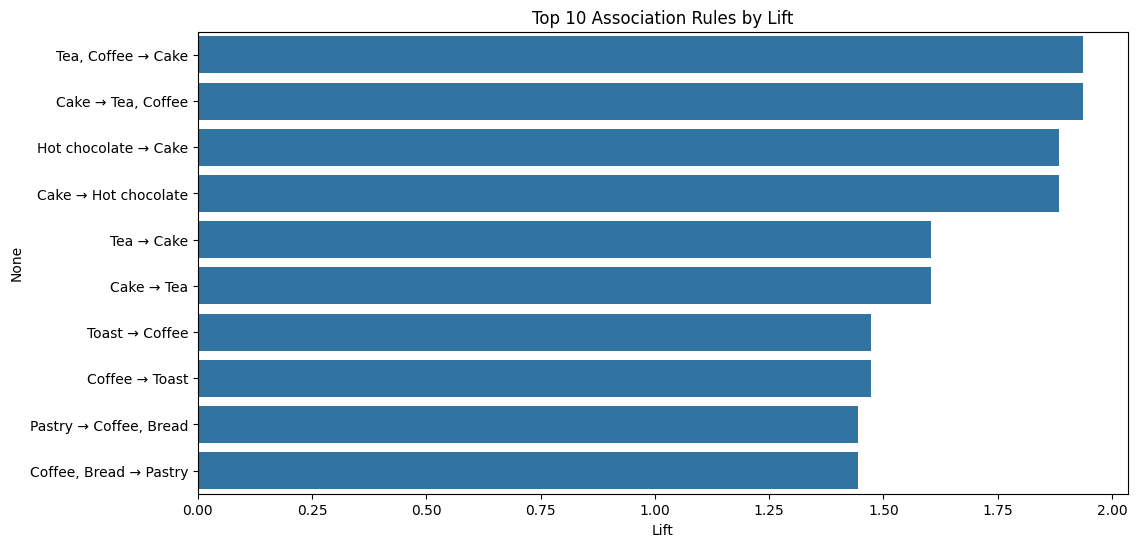

In [111]:
top_rules = rules.sort_values('lift', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' +
            top_rules['consequents'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.show()




---

###  Observations:

1. **Highest Lift Rules:**
   - The rules `Tea, Coffee → Cake` and `Cake → Tea, Coffee` have the **highest lift** (~1.95).
   - This means when people buy both **Tea and Coffee**, they are almost **twice as likely** to also buy **Cake** compared to random chance.

2. **Symmetric Rules:**
   - Notice the pairs like:
     - `Tea, Coffee → Cake`
     - `Cake → Tea, Coffee`
   - **Symmetric association rules** are common when items are bought together strongly.

3. **Hot Chocolate and Cake Link:**
   - `Hot chocolate → Cake` and `Cake → Hot chocolate` both show **high lift (~1.9)**.
   - Buying **Hot Chocolate** significantly increases the chance of buying **Cake** (and vice-versa).

4. **Single-to-Single Item Associations:**
   - Rules like `Toast → Coffee` and `Coffee → Toast` have a **lower lift (~1.5)** compared to the others, but still meaningful.
   - Indicates some customers buying Toast are quite likely to buy Coffee.

5. **Multi-item Antecedents and Consequents:**
   - Some rules like `Pastry → Coffee, Bread` and `Coffee, Bread → Pastry` show that when people buy one item, **bundles** of other items are triggered.

6. **Overall Lift Values:**
   - All top rules have a **lift > 1**, meaning **positive correlation** between items (they are bought together more often than by random chance).
   - A lift closer to **2** is **very strong** in market basket analysis.

---

### Quick Conclusion:

- **Cake** is a very central item — it’s associated with Tea, Coffee, and Hot Chocolate purchases.
- **Hot Beverages** (Tea, Coffee, Hot Chocolate) act as **anchors** for purchasing sweet or bakery items like Cake and Pastry.
- There’s strong potential for **cross-selling combos** — e.g., promoting Tea/Coffee with Cake offers.

---


##**Visualize top 10 based on confidence**

<ipython-input-112-f4ea5343db7f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence', y='rule', data=top_confidence, palette='Blues_d')


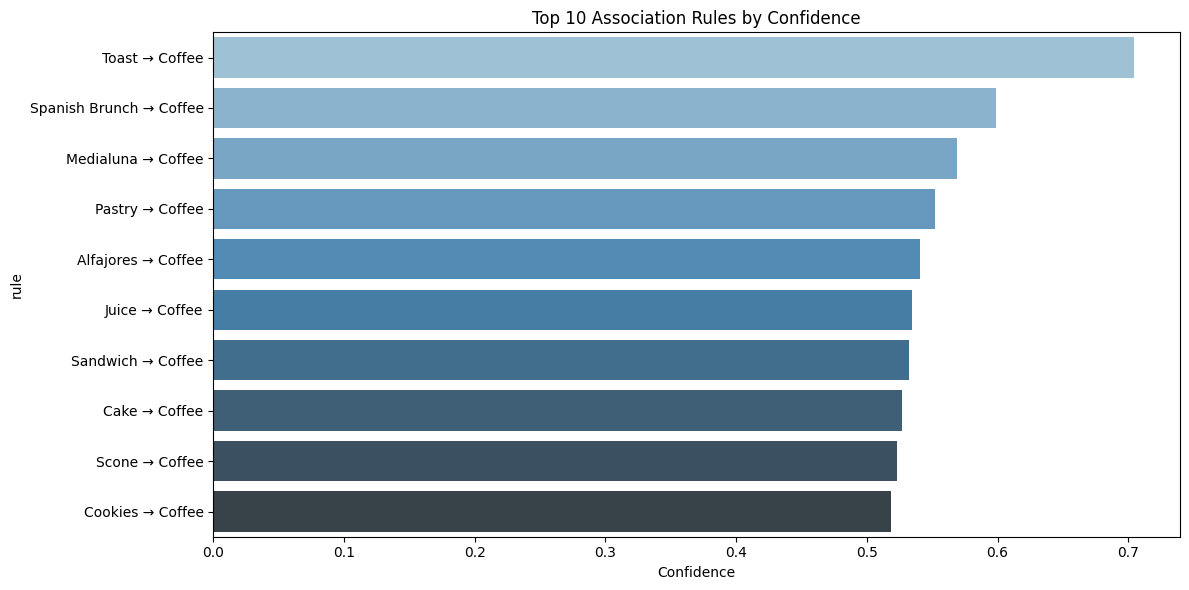

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by confidence
top_confidence = rules.sort_values('confidence', ascending=False).head(10)

# Create a label for each rule: "antecedent → consequent"
top_confidence['rule'] = top_confidence['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + \
                          top_confidence['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 6))
sns.barplot(x='confidence', y='rule', data=top_confidence, palette='Blues_d')
plt.xlabel('Confidence')
plt.title('Top 10 Association Rules by Confidence')
plt.tight_layout()
plt.show()



---

###  Observations:

1. **Top Rule by Confidence:**
   - `Toast → Coffee` has the **highest confidence (~0.7)**.
   - This means that if a customer buys Toast, there is about a **70% chance** they will also buy Coffee.

2. **Strong Food-to-Coffee Associations:**
   - Many food items (e.g., **Spanish Brunch, Medialuna, Pastry, Alfajores, Juice, Sandwich**) strongly lead to Coffee purchases.
   - Indicates **Coffee is a common follow-up purchase** when people buy food.

3. **Cake and Coffee Link:**
   - `Cake → Coffee` also appears with high confidence (~0.52).
   - This confirms that **Cake customers are very likely** to buy Coffee — useful for bundling offers.

4. **Even Confidence Levels:**
   - After the top 3 rules, the confidence values from **Pastry → Coffee** to **Cookies → Coffee** are relatively **close together (~0.5-0.52)**.
   - This suggests a **consistent cross-sell pattern** for various bakery items leading to Coffee.

5. **Coffee as the Most Common Consequent:**
   - In **all 10 rules**, Coffee is the consequent (right-hand side).
   - Meaning: **Coffee is the ultimate cross-sell target** no matter the initial item.

6. **Potential Business Insight:**
   - **Coffee is a very strong anchor product** — when designing combo deals, starting with a food item and bundling Coffee is likely to succeed.

---

### Quick Conclusion:

- **Toast, Spanish Brunch, and Medialuna** are **top food items** for driving Coffee sales.
- Coffee **dominates** as a product frequently bought together with various snacks and bakery items.
- There’s an opportunity to **design meal combos** (e.g., “Toast + Coffee” breakfast deals) to further boost sales.

---

